# AllLife Bank Customer Segmentation 

## Background

AllLife bank has hired me to look into their credit card customers.  Their goal is to improve their market penetration.  They are looking to upgrade the service delivery model to improve customer service.  After I perform data analysis using unsupervised learning, I will have clusters of customers for AllLife.  When I have clusters for their customers, AllLife can improve service delivery to each cluster, and in turn, be more efficient.

## Key Question to Answer

How could the AllLife market more efficiently to their customers? How many clusters do we have in the data optimally? What are my recommendations to AllLife?  How should they change service delivery for each cluster?

## Dataset
#### The lines below give a brief definition of each variable in the dataset:

Sl_No: Primary key of the records.

Customer Key: Customer identification number.

Average Credit Limit: Average credit limit of each customer for all credit cards.

Total credit cards: Total number of credit cards possessed by the customer.

Total visits bank: Total number of Visits that customer made (yearly) personally to the bank.

Total visits online: Total number of visits or online logins made by the customer (yearly).

Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly).

In [1]:
# To help make our code look less cluttered, this removes the warnings that pop up.
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Importing the packages that may be needed for this project

%load_ext nb_black

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from scipy.stats import zscore
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

<IPython.core.display.Javascript object>

In [3]:
# Reading our dataset titled "Credit Card Customer Data.xlsx".
file = pd.read_excel("Credit Card Customer Data.xlsx", sheet_name="Sheet1")

# Making a copy of the dataset, so I am not making any changes to the original file.
data = file.copy()

<IPython.core.display.Javascript object>

In [4]:
# Viewing the first 5 rows of the dataset
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


<IPython.core.display.Javascript object>

In [5]:
# Viewing the last 5 rows of the dataset
data.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


<IPython.core.display.Javascript object>

In [6]:
# Looking at the shape of the dataset
data.shape

(660, 7)

<IPython.core.display.Javascript object>

#### Observations
This dataset has 660 rows and 7 columns.

In [7]:
# Let's get an understanding on missing values in our dataset
data.isnull().sum().sort_values(ascending=False)

Total_calls_made       0
Total_visits_online    0
Total_visits_bank      0
Total_Credit_Cards     0
Avg_Credit_Limit       0
Customer Key           0
Sl_No                  0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations
This dataset does not obtain missing values

In [8]:
# Checking for duplicate values
data["Customer Key"].duplicated().sum()

5

<IPython.core.display.Javascript object>

In [9]:
# This dataset appears to have some duplicates in Customer Key, I am going to keep the first of the duplicates
data = data.drop_duplicates(subset=["Customer Key"], keep="first")

<IPython.core.display.Javascript object>

In [10]:
# Looking to see if duplicates are removed
data.shape

(655, 7)

<IPython.core.display.Javascript object>

#### Observations
My duplicates have been removed.

In [11]:
# Let's drop the Sl_No and Customer Key columns, as it is just an identifier column
data.drop(["Sl_No"], axis=1, inplace=True)
data.drop(["Customer Key"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

#### Observations
My identifier columns have been dropped

In [12]:
# Giving us some basic numbers in regards to our dataset. ".T" is to transpose the data.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,655.0,34242.748092,37240.896986,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,655.0,4.691603,2.169325,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,655.0,2.401527,1.633648,0.0,1.0,2.0,4.0,5.0
Total_visits_online,655.0,2.606107,2.940380,0.0,1.0,2.0,4.0,15.0
Total_calls_made,655.0,3.601527,2.867352,0.0,1.0,3.0,5.0,10.0


<IPython.core.display.Javascript object>

In [13]:
# Looking at the data types of our variables
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     655 non-null    int64
 1   Total_Credit_Cards   655 non-null    int64
 2   Total_visits_bank    655 non-null    int64
 3   Total_visits_online  655 non-null    int64
 4   Total_calls_made     655 non-null    int64
dtypes: int64(5)
memory usage: 30.7 KB


<IPython.core.display.Javascript object>

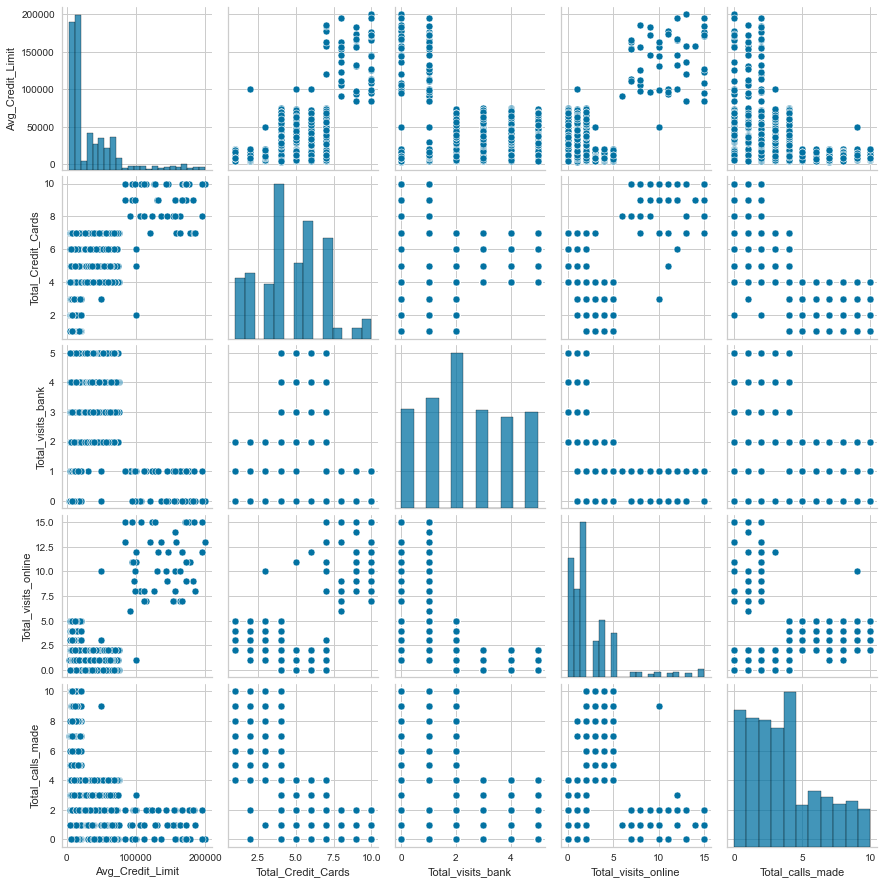

<IPython.core.display.Javascript object>

In [14]:
# I am using a pairplot to give a big picture on the relationships between the variables inside our dataset
sns.pairplot(data)

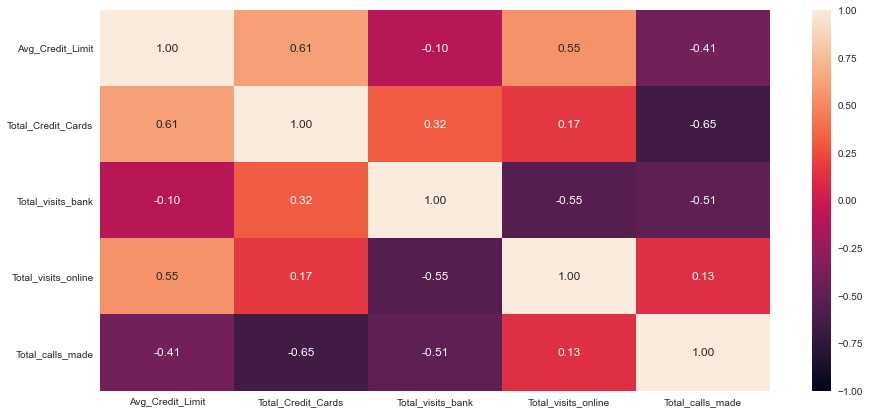

<IPython.core.display.Javascript object>

In [15]:
# Heatmap of variable correlation
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

#### Observations
There is a positive correlation with total cards and visits bank.

There is a negative correlation between visits online and visits bank.

There is a positive correlation between total cards and credit limit.

## EDA

In [16]:
# Defining a function to show percentage on bars for our countplots
def percent(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = "{:.1f}%".format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=12)
    plt.show()


# Defining a histogram function to show us outliers and boxplot, as well as median and mean vlines on the plot
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color="violet")
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(feature, kde=False, ax=ax_hist2)
    ax_hist2.axvline(np.mean(feature), color="green", linestyle="--")
    ax_hist2.axvline(np.median(feature), color="black", linestyle="-")


# Creating num_col to grab all datatypes with numbers
num_col = data.select_dtypes(include=np.number).columns.tolist()

<IPython.core.display.Javascript object>

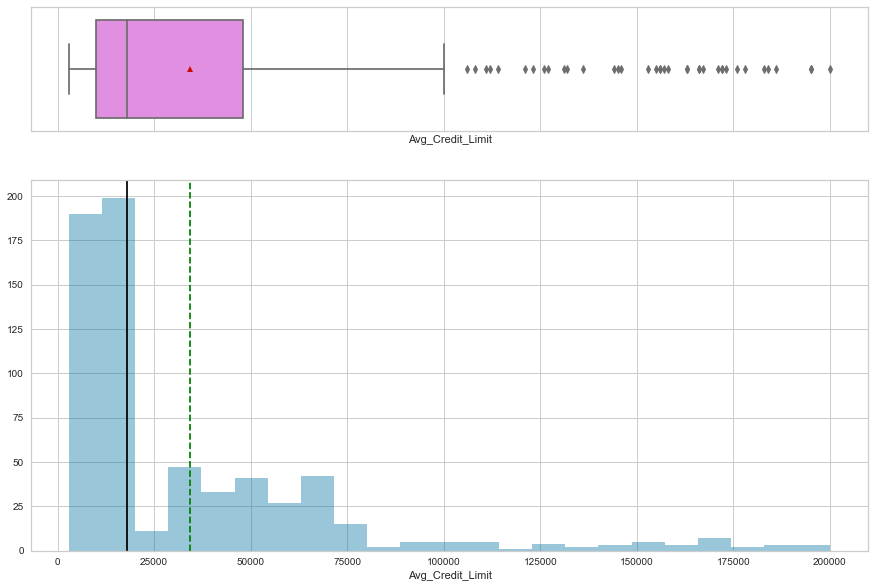

<IPython.core.display.Javascript object>

In [17]:
# Histogram showing Avg_Credit_Limit
histogram_boxplot(data["Avg_Credit_Limit"])

#### Observations
There appears to be some outliers here.  I may not remove though, because these are plausible datapoints.  My test later will check that. The outliers are also presenting a right skew.

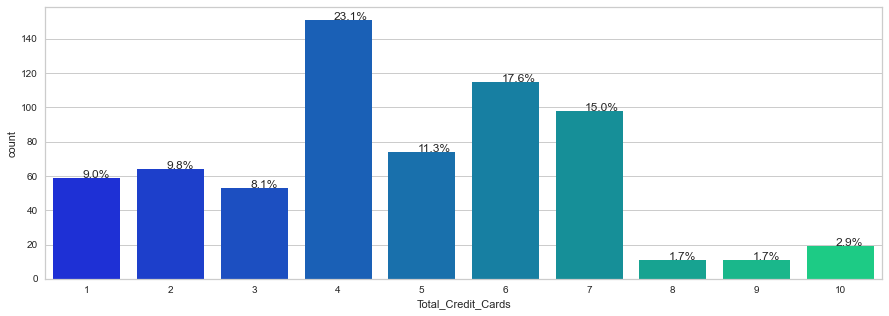

<IPython.core.display.Javascript object>

In [18]:
# Countplot of Total_Credit_Cards
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Total_Credit_Cards"], palette="winter")
percent(ax, data["Total_Credit_Cards"])

#### Observations
It appears 4 through 7 occupy most of the data, however the range is larger than this (1-10).

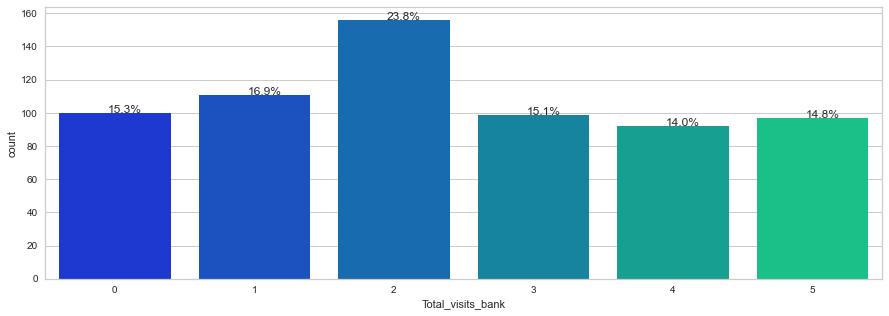

<IPython.core.display.Javascript object>

In [19]:
# Countplot of Total_visits_bank
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Total_visits_bank"], palette="winter")
percent(ax, data["Total_visits_bank"])

#### Observations
These are quite evenly distributed, all things considered.  The most common visits is 2, and they range from 0 to 5.

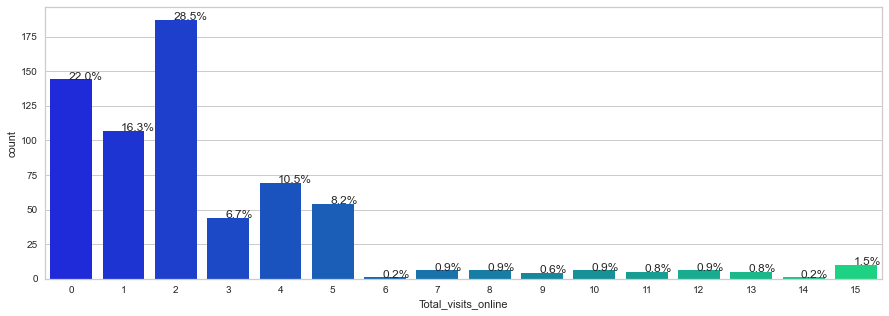

<IPython.core.display.Javascript object>

In [20]:
# Countplot of Total_visits_online
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Total_visits_online"], palette="winter")
percent(ax, data["Total_visits_online"])

#### Observations
Most of the dataset are between 0 and 5.  However the maximum is 15.

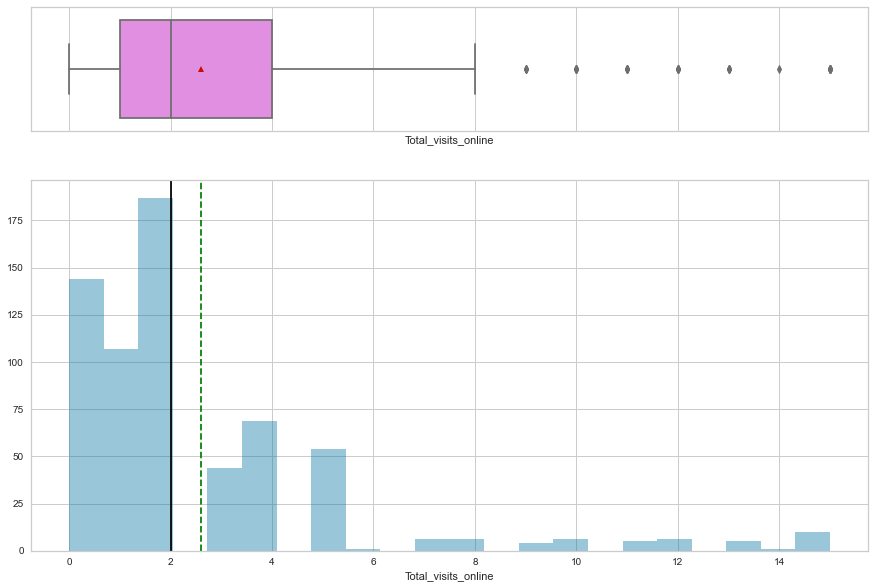

<IPython.core.display.Javascript object>

In [21]:
# Histogram showing Total_visits_online
histogram_boxplot(data["Total_visits_online"])

#### Observations
There is a range of 15 here, most of the values, occupying over 92% of the sample, are between 0 and 5.  It shows that some of these are outliers, however.  These are plausible.

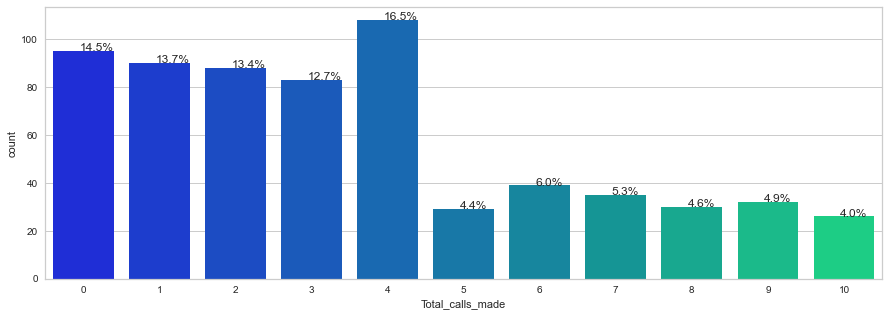

<IPython.core.display.Javascript object>

In [22]:
# Countplot of Total_calls_made
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Total_calls_made"], palette="winter")
percent(ax, data["Total_calls_made"])

#### Observations
0 through 4 take up just over 70% of the data.

### Multivariate Analysis

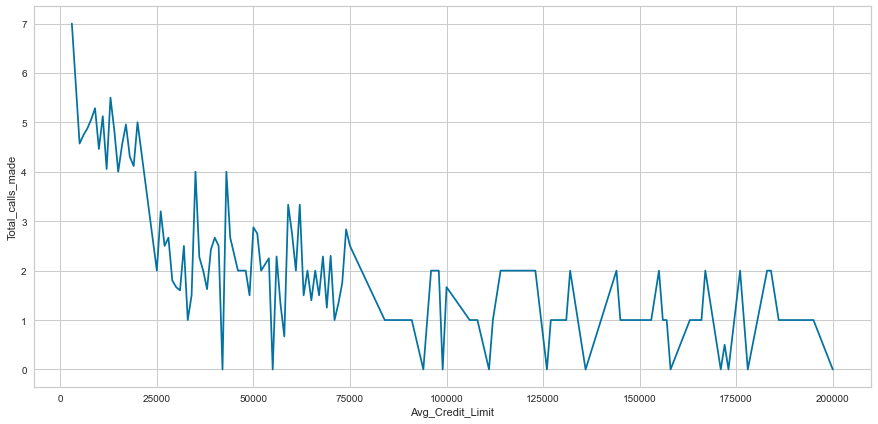

<IPython.core.display.Javascript object>

In [23]:
# Lineplot showing Avg_Credit_Limit and Total_calls_made
plt.figure(figsize=(15, 7))
sns.lineplot(
    data["Avg_Credit_Limit"],
    data["Total_calls_made"],
    ci=0,
)
plt.show()

#### Observations
I see here, that as credit limit increases, calls made goes down

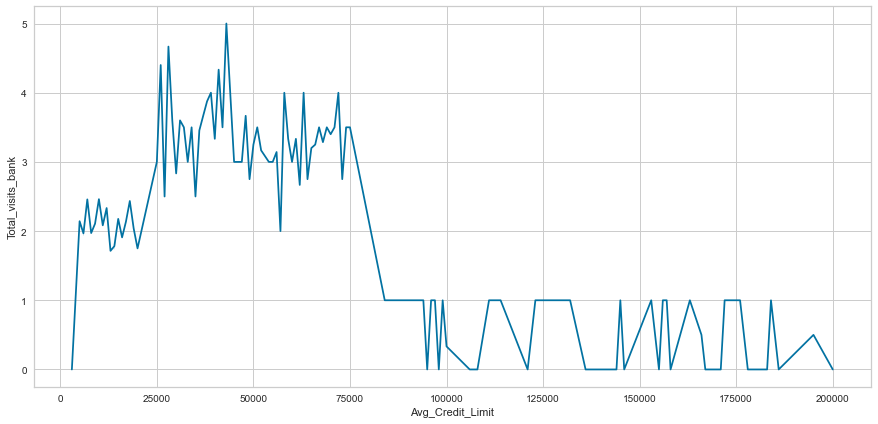

<IPython.core.display.Javascript object>

In [24]:
# Lineplot showing Avg_Credit_Limit and Total_visits_bank
plt.figure(figsize=(15, 7))
sns.lineplot(
    data["Avg_Credit_Limit"],
    data["Total_visits_bank"],
    ci=0,
)
plt.show()

#### Observations
As credit limit increases visits increase until 75,000; after that, they fall off.

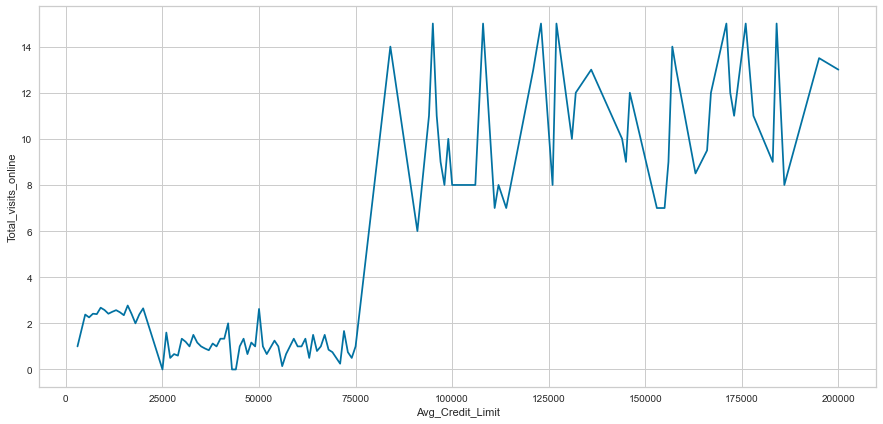

<IPython.core.display.Javascript object>

In [25]:
# Lineplot showing Avg_Credit_Limit and Total_visits_online
plt.figure(figsize=(15, 7))
sns.lineplot(
    data["Avg_Credit_Limit"],
    data["Total_visits_online"],
    ci=0,
)
plt.show()

#### Observations
As credit limit increases past 75,000, I see a sharp increase in visits online.

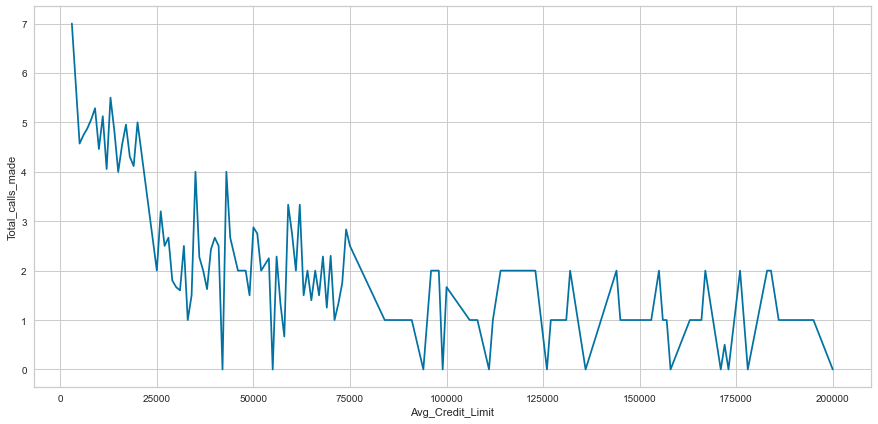

<IPython.core.display.Javascript object>

In [26]:
# Lineplot showing Avg_Credit_Limit and Total_calls_made
plt.figure(figsize=(15, 7))
sns.lineplot(
    data["Avg_Credit_Limit"],
    data["Total_calls_made"],
    ci=0,
)
plt.show()

#### Observations
As credit limit decreases, calls made go down.  Low credit limit increases calls.

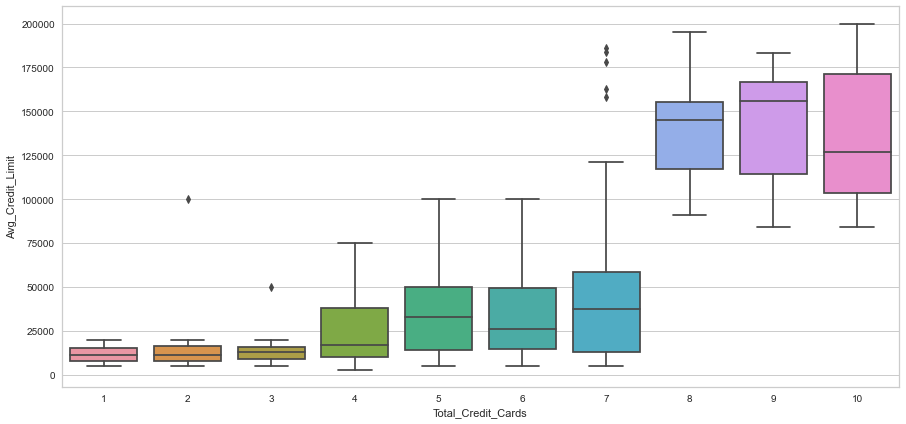

<IPython.core.display.Javascript object>

In [27]:
# Boxplot of Total_Credit_Cards and Avg_Credit_Limit
plt.figure(figsize=(15, 7))
sns.boxplot(data["Total_Credit_Cards"], data["Avg_Credit_Limit"])
plt.show()

#### Observations
As card total increases, so does credit limit.

## Outlier Treatment

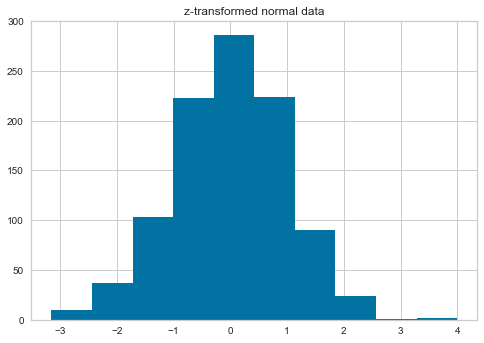

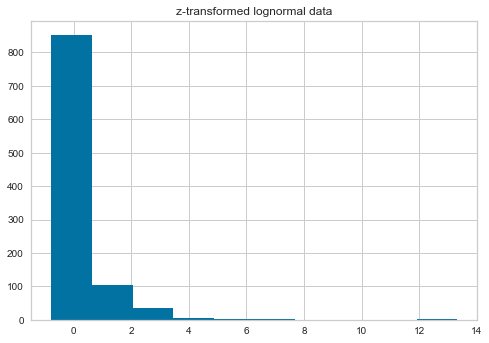

<IPython.core.display.Javascript object>

In [28]:
# Using Z-Transformation to flag outliers in our variables
def z_transform(x):
    return (x - np.mean(x)) / np.std(x)


np.random.seed(1)
x1 = np.random.normal(size=1000)
x2 = np.random.lognormal(size=1000)


plt.hist(z_transform(x1))
plt.title("z-transformed normal data")
plt.show()


plt.hist(z_transform(x2))
plt.title("z-transformed lognormal data")
plt.show()

In [29]:
# Let's flag outliers for each of the variables
def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [0.25, 0.75]))
    return np.mean(np.abs(x - np.median(x)) > length)


print(frac_outside_1pt5_IQR(x1))
print(frac_outside_1pt5_IQR(x2))

0.05
0.132


<IPython.core.display.Javascript object>

In [30]:
# Outliers of Avg_Credit_Limit
quartiles = np.quantile(
    data["Avg_Credit_Limit"][data["Avg_Credit_Limit"].notnull()], [0.25, 0.75]
)
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_powers1 = data.loc[
    np.abs(data["Avg_Credit_Limit"] - data["Avg_Credit_Limit"].median()) > power_4iqr,
    "Avg_Credit_Limit",
]
outlier_powers1

Q1 = 10000.0, Q3 = 48000.0, 4*IQR = 152000.0


622    176000
624    178000
630    200000
631    195000
637    173000
639    184000
645    171000
646    186000
647    183000
650    195000
654    172000
658    172000
Name: Avg_Credit_Limit, dtype: int64

<IPython.core.display.Javascript object>

In [31]:
# Dropping outliers of Avg_Credit_Limit
data.drop(outlier_powers1.index, axis=0, inplace=True)

<IPython.core.display.Javascript object>

In [32]:
# Outliers of Total_visits_online
quartiles = np.quantile(
    data["Total_visits_online"][data["Total_visits_online"].notnull()], [0.25, 0.75]
)
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_powers2 = data.loc[
    np.abs(data["Total_visits_online"] - data["Total_visits_online"].median())
    > power_4iqr,
    "Total_visits_online",
]
outlier_powers2

Q1 = 1.0, Q3 = 3.5, 4*IQR = 10.0


612    14
617    13
618    13
619    13
620    15
628    15
640    15
644    15
653    15
656    13
Name: Total_visits_online, dtype: int64

<IPython.core.display.Javascript object>

In [33]:
# Dropping outliers of Total_visits_online
data.drop(outlier_powers2.index, axis=0, inplace=True)

<IPython.core.display.Javascript object>

In [34]:
# Checking the shape after outlier treatment
data.shape

(633, 5)

<IPython.core.display.Javascript object>

#### Observations
Following outlier treatment, the dataset has 633 rows left.

## Scaling My Data

In [35]:
# Scaling my dataset. In Unsupervised Learning, I always want to scale my variables.
data_scaled_attr = data.iloc[:, :]
data_scaled_attr.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
5,20000,3,0,1,8
6,100000,5,0,11,2
7,15000,3,0,1,1
8,5000,2,0,2,2
9,3000,4,0,1,7


<IPython.core.display.Javascript object>

In [36]:
# Applying zscore to the scaled dataset
data_scaled = data_scaled_attr.apply(zscore)

<IPython.core.display.Javascript object>

## K-Means Clustering

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

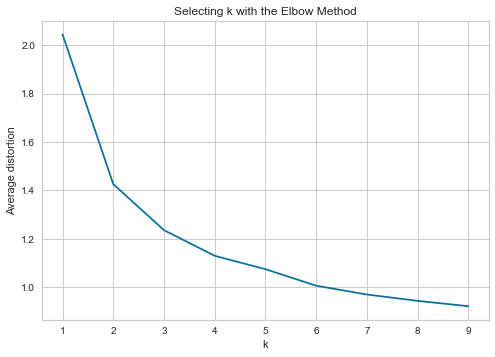

<IPython.core.display.Javascript object>

In [37]:
# Finding my optimal amount of clusters using elbow method
from scipy.spatial.distance import cdist

clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model1 = KMeans(n_clusters=k)
    model1.fit(data_scaled)
    prediction = model1.predict(data_scaled)
    meanDistortions.append(
        sum(np.min(cdist(data_scaled, model1.cluster_centers_, "euclidean"), axis=1))
        / data_scaled.shape[0]
    )


plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")

#### Observations
When looking at our the Elbow Method, I see a bend at 3.  I will take a look at K=3.  I will verify that using other methodology.

For n_clusters = 2, the silhouette score is 0.446781063473325)
For n_clusters = 3, the silhouette score is 0.5050981833066627)
For n_clusters = 4, the silhouette score is 0.3527454596594395)
For n_clusters = 5, the silhouette score is 0.3283163694648441)
For n_clusters = 6, the silhouette score is 0.24086012364567413)
For n_clusters = 7, the silhouette score is 0.23601811782279403)
For n_clusters = 8, the silhouette score is 0.22938625856641115)
For n_clusters = 9, the silhouette score is 0.22237829417614113)


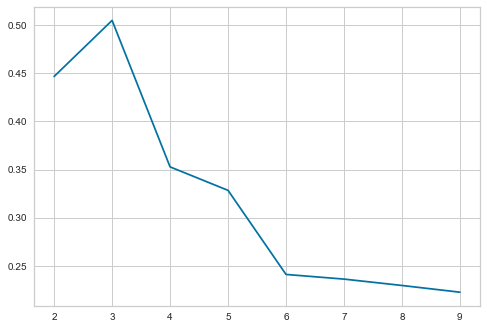

<IPython.core.display.Javascript object>

In [38]:
# Finding my optimal amount of clusters using silouette score
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((data_scaled))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(data_scaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

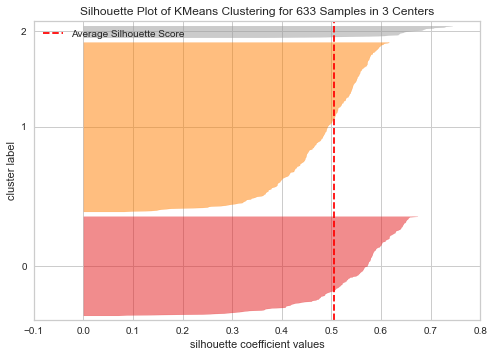

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 633 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [39]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(data_scaled)
visualizer.show()

#### Observations
3 clusters appears to be optimal based off this testing in BOTH silhouette and and elbow methodology.

In [40]:
# 3 Clusters
model1 = KMeans(3)
model1.fit(data_scaled)
prediction = model1.predict(data_scaled)

# Append the prediction
data["GROUP"] = prediction
data_scaled["GROUP"] = prediction
data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,1
1,50000,3,0,10,9,0
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,2


<IPython.core.display.Javascript object>

In [41]:
# Creating Group column to group into clusters
customer_cluster1 = data.groupby(["GROUP"])
customer_cluster1.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536
1,33604.712042,5.505236,3.494764,0.976440,2.005236
2,129148.148148,8.703704,0.666667,9.222222,1.259259


<IPython.core.display.Javascript object>

#### Observations
When looking at the mean for each cluster, I see that there are some big picture differences between these.

array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

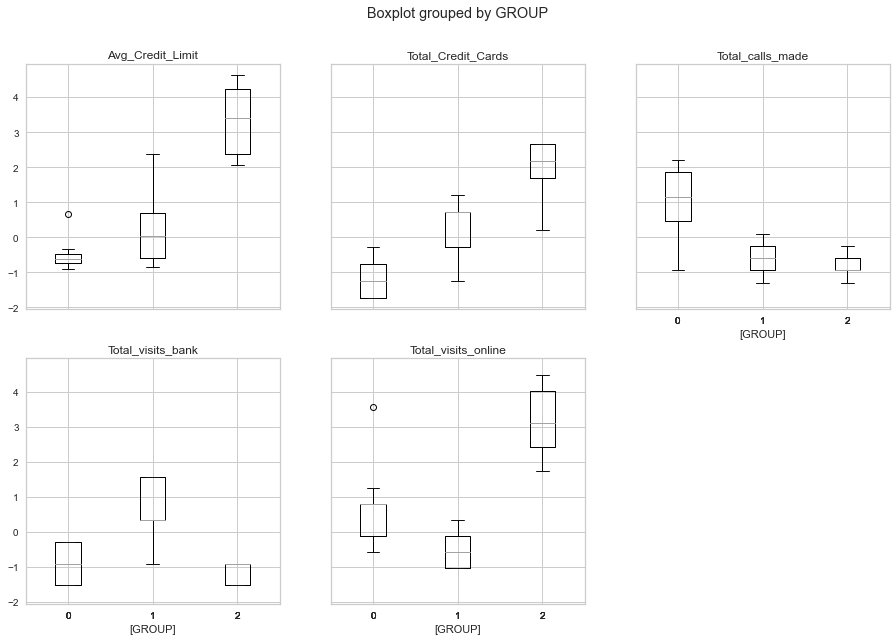

<IPython.core.display.Javascript object>

In [42]:
# Boxplot of my clusters for the variables
data_scaled.boxplot(by="GROUP", layout=(2, 3), figsize=(15, 10))

## Hierarchical Clustering

In [43]:
# Creating my model for agglomerative clustering with 3 clusters
model2 = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")

<IPython.core.display.Javascript object>

In [44]:
# Fitting the data
model2.fit(data_scaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

<IPython.core.display.Javascript object>

In [45]:
# Using head to show the data
data_scaled_attr["GROUP"] = model2.labels_
data_scaled_attr.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,2
1,50000,3,0,10,9,0
2,50000,7,1,3,4,2
3,30000,5,1,1,4,2
4,100000,6,0,12,3,1
5,20000,3,0,1,8,0
6,100000,5,0,11,2,1
7,15000,3,0,1,1,0
8,5000,2,0,2,2,0
9,3000,4,0,1,7,0


<IPython.core.display.Javascript object>

In [46]:
# Grouping by clusters
customer_cluster2 = data_scaled_attr.groupby(["GROUP"])

<IPython.core.display.Javascript object>

In [47]:
# Showing the mean of my clusters
customer_cluster2.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536
1,129148.148148,8.703704,0.666667,9.222222,1.259259
2,33604.712042,5.505236,3.494764,0.976440,2.005236


<IPython.core.display.Javascript object>

#### Observations
The means are quite similar to the k-means.  The only difference is what each cluster is assigned to.

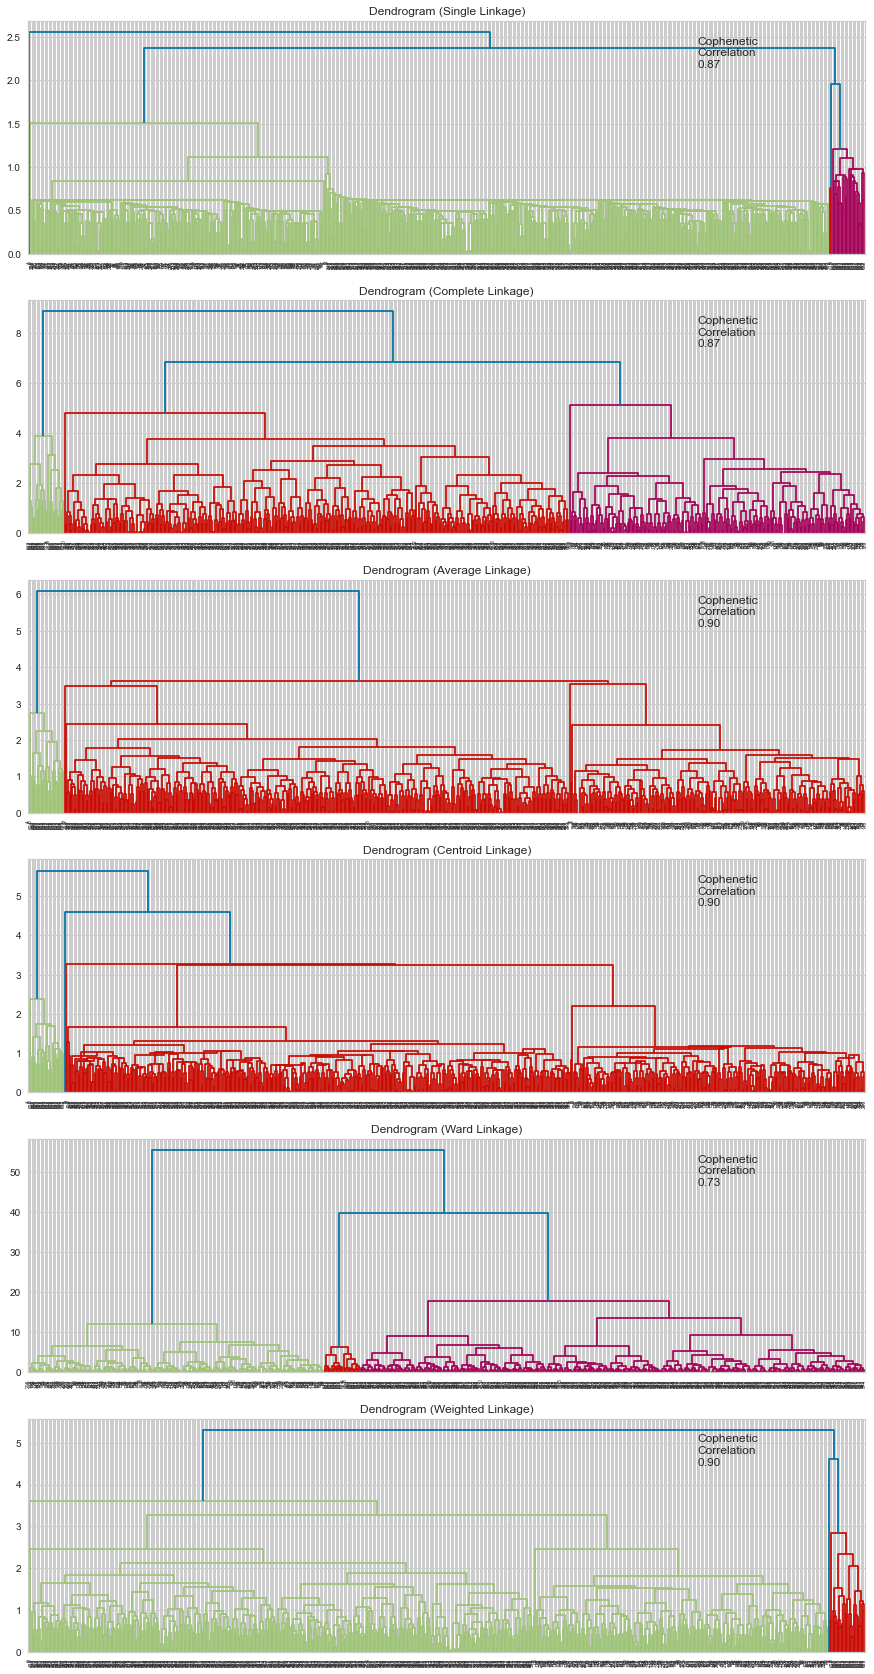

<IPython.core.display.Javascript object>

In [48]:
# Using the following 6 linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []


fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

for i, method in enumerate(linkage_methods):
    Z = linkage(data_scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(data_scaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

#### Observations
Ward methodology appears to be the worst out of the 3.  The Eucledian "Average" Dendogram gets the best results. That being said, the Ward linkage "looks" the best.

## Profiling

In [49]:
# Cluster profiling for mean
cluster_profile = data_scaled.groupby("GROUP").mean()

<IPython.core.display.Javascript object>

In [50]:
# Getting some total counts for each cluster
cluster_profile["Count of GROUPs"] = (
    data_scaled.groupby("GROUP")["Total_Credit_Cards"].count().values
)

<IPython.core.display.Javascript object>

In [51]:
# To display my profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Count of GROUPs
GROUP,,,,,,
0,-0.605875,-1.044119,-0.948316,0.600978,1.108316,224
1,0.118602,0.468622,0.634743,-0.578211,-0.589812,382
2,3.348519,2.032177,-1.112923,3.194719,-0.850179,27


<IPython.core.display.Javascript object>

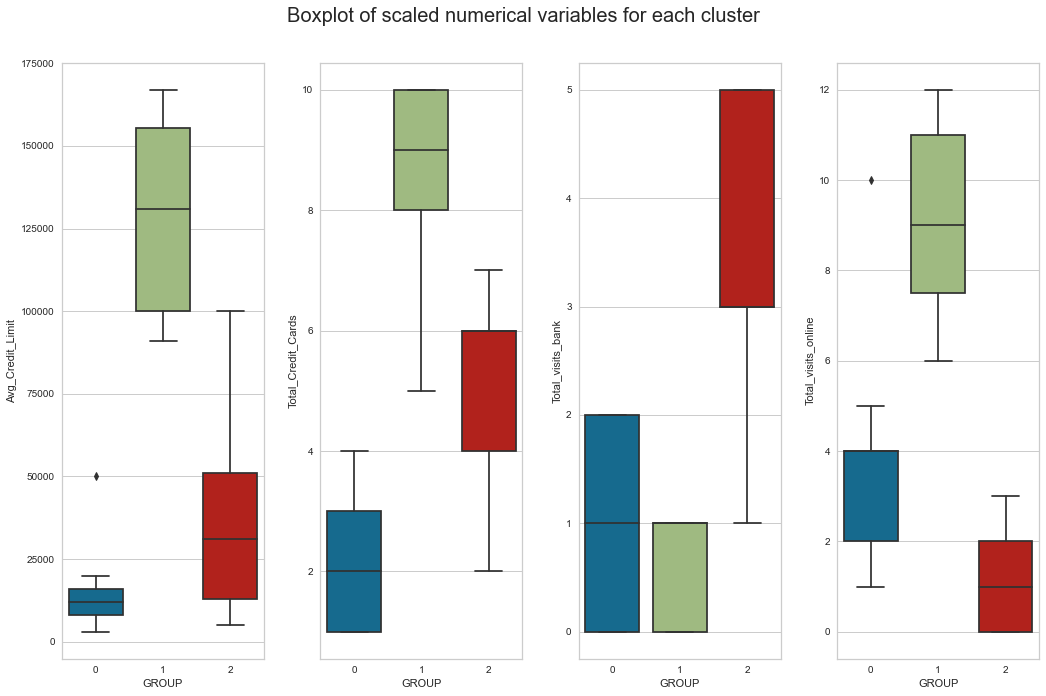

<IPython.core.display.Javascript object>

In [52]:
# Boxplot of the groups
fig, axes = plt.subplots(1, 4, figsize=(15, 10))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(4):
    sns.boxplot(
        ax=axes[ii],
        y=data[num_col[counter]],
        x=data["GROUP"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

## Conclusions

- **Cluster 0**:
    - This is made up of 35% of the sample
    - Low credit limit (under 25k)
    - Low amount of credit cards (Maximum of 4)
    - Low amount of visits to the bank (0-2 times)
    - High amount of online visits (1-5 times)
    - Moderate number of calls made (average of 6)
    
    
- **Cluster 1**:
    - Just over 60% is in this sample
    - Extremely high credit limit (Over 100k on average)
    - Extremely high amount of credit cards (5-10 times)
    - Low amount of visits to the bank (0-1 times) 
    - High amount of visits online (6-12 times)
    - Low number of calls made (average of 1)


- **Cluster 2**:
    - Just over 4% of the sample
    - Moderate credit limit (More than cluster 1, but under 100k)
    - Moderate amount of cards (2-7 cards)
    - Extremely high number of visits to the bank (1-5 times)
    - Extremely low number of visits online (0-3 times)
    - Lowest number of calls made (Less than 1)

    
    
- **For marketing purposes, there are several things to gain from these 3 clusters**:

-There is strong online usage amongst cluster 0 and 1 mostly.  If they are looking to get the attention of these individuals, they should use online methods.  These groups do not visit the bank as frequently as group 2.

-Group 2 appears to be visiting the bank a lot.  This could be a for many different reasons.  Maybe they do not like to go online.  If AllLife would prefer all of their customers to use online, then group 2 specifically should be marketed to for online usage.  The people who tend to go into the bank are quite low in the grand scheme of things, however.  This cluster is only 4% of the dataset.  Providing a pamphlet to these customers on visits advertising their site would be ideal.  

-Those who use online banking should probably receive all communication electronically.  Those who tend to call and come into the bank should receive communication via the mail.

-There is no need to try and get more credit cards to Group 1, and maybe even group 2.  However, they could try and market more credit cards to group 0.  These individuals may be risky, however.  They have low credit limits due to their credit score, generally.  Also, these people are most likely to get more cards though because of money problems.